In [1]:
clc; clear; 
close all;
pkg load image;


ans =
{
  [1,1] = fltk
  [1,2] = gnuplot
}



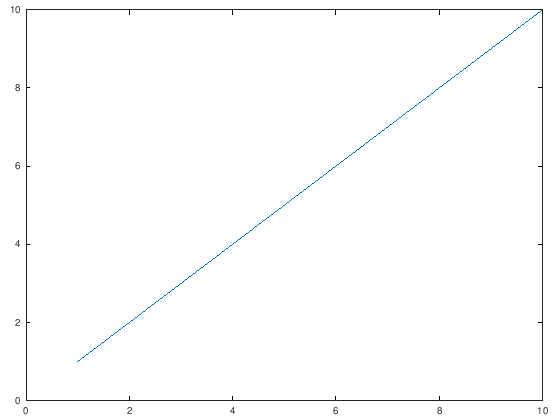

In [4]:
available_graphics_toolkits()
plot (1:10);
graphics_toolkit ("gnuplot");

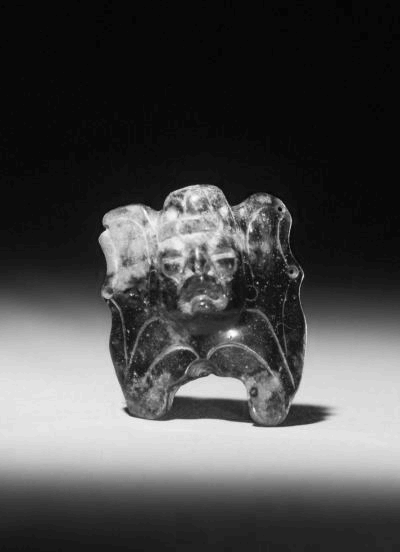

In [5]:
I_color = imread("WingedFigure.jpg");
A = I_color(:,:,1);
A =im2double(A)*255;

imshow(A);

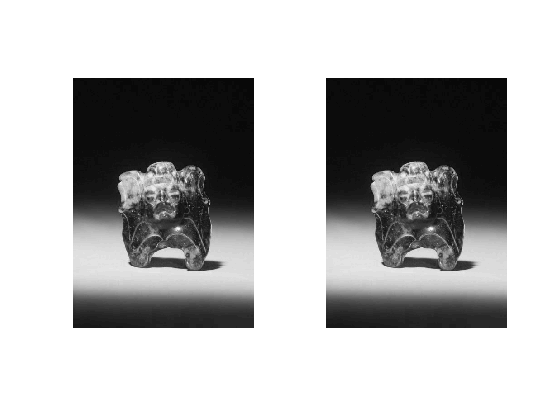

In [6]:
function  plot2images(image1, image2)
  figure;
  subplot(1,2,1);
  imshow(image1, [0, 255]);
  subplot(1,2,2);
  imshow(image2, [0, 255]);
end

function  plot3images(image1, image2, image3)
  figure;
  subplot(1,3,1);
  imshow(image1,[0, 255]);
  subplot(1,3,2);
  imshow(image2,[0, 255]);
  subplot(1,3,3);
  imshow(image3,[0, 255]);
end
plot2images(A, A);

In [83]:
function w = generate_random_weights(N)
  w = rand(N,1);
  w = w/sum(w);
  return;
end
function [minimized_matrix,limited_data] = minimize_matrix_size(input_matrix,w)
% function [minimized_matrix, limited_data] = minimize_matrix_size(input_matrix, w)
  [C, ia, ic] = unique(input_matrix(:),'sorted');
  limited_data=C;
  % min_ld = C(1);
  % max_ld = C(end);

  k=3;
  % w = generate_random_weights(k);
  intermediate_matrix = input_matrix(:);
  % min_ld = min(intermediate_matrix);
  % max_ld = max(intermediate_matrix);
  [m, n] = size(intermediate_matrix);
  intermediate_matrix = vertcat(intermediate_matrix, zeros(k-mod(m,k),1));
  [m, n] = size(intermediate_matrix);
  minimized_matrix=zeros(m/3,1);
  for p=1:m/k
      minimized_matrix(p)= sum(intermediate_matrix(1:3).* w);
      intermediate_matrix=intermediate_matrix(4:end);
  end

end


function [value_matrix, zero_matrix] = generate_value_matrix(minimized_matrix)
value_matrix = [minimized_matrix(1)];
zero_matrix = [0; 0];
i = 2;
zero_counter=0;
while i<=size(minimized_matrix,1)
  if minimized_matrix(i)==0
    zero_counter=zero_counter+1;
    zero_matrix(end)=zero_counter;
  else
    value_matrix = [value_matrix; minimized_matrix(i)];
    zero_matrix = [zero_matrix; 0; 0;];
    zero_counter=0;
  end
  i=i+1;
end
endfunction

In [111]:
 gw = generate_random_weights(3)


Q=20;
B = floor((randi(60,4)-60/2)/Q)
w = generate_random_weights(3);
[minimized_matrix, limited_data] = minimize_matrix_size(B,w);
% [minimized_matrix, min_ld, max_ld] = minimize_matrix_size(B);
limited_data
minimized_matrix




HFC = [5 0 0 0 0 0.3 0 0 0 0 -1 0 0 0 0 0 0 0 0 2.4  0 0 0 0](:);
[value_matrix, zero_matrix] = generate_value_matrix(HFC)

gw =

   0.052019
   0.359905
   0.588076

B =

  -2   1   1   0
  -1   0   0   1
  -1  -1   0   0
   0   0   0   1

limited_data =

  -2
  -1
   0
   1

minimized_matrix =

  -1.8221
   0.0411
  -0.6854
        0
   0.0411
   0.8221

value_matrix =

   5.0000
   0.3000
  -1.0000
   2.4000

zero_matrix =

   0
   4
   0
   4
   0
   8
   0
   4



In [112]:
function mid = binarySearchRec(list,value,low,high)
    if( high < low )
        mid = [];
        return
    end
    mid = floor((low + high)/2);
    if( list(mid) > value )
        mid = binarySearchRec(list,value,low,mid-1);
        return
    elseif( list(mid) < value )
        mid = binarySearchRec(list,value,mid+1,high);
        return
    else
        return
    end
end

In [113]:
% A = [1 1 1 3 6 2 2 2 3 4 3 3];
function [unique_elements, r_vector,R] = countElements(input_array) 
    A=input_array(:);
    unique_elements = unique(A);
    r_vector=histc(A,unique_elements);
    R=sum(r_vector);
endfunction

% A = [1 1 1 3 6 2 2 2 3 4 3 3];
% [unique_elements, r_vector,R] = countElements(A)

In [2]:
function [ encoded_data,unique_elements , r_vector] = arithmetic_encoder(input_data, precision=32, EOF=255)
    input_data = [input_data(:); EOF];
    whole=power(2,precision);
    half=whole/2;
    quarter=whole/4;
    [unique_elements, r_vector,R] = countElements(input_data);
    n_unique_elements = size(unique_elements,1);
    x=input_data(:);
    % x=[input_data(:) ; EOF];
    c=[0; r_vector(1:end-1)];
    d=c+r_vector;

    a=0;
    b=whole;
    s=0;
    encoded_data=[];
    for i=1:size(x,1)
        index=binarySearchRec(unique_elements,x(i),1,n_unique_elements);
        w=b-a;
        b=a+round(w*d(index)/R);
        a=a+round(w*c(index)/R);
        while  b<half ||  a>half
            if(b<half)
                encoded_data=[encoded_data 0 ones(1,s)];
                s=0;
                a=2*a;
                b=2*b;
            elseif a>half
                encoded_data=[encoded_data 1 zeros(1,s)];
                s=0;
                a=2*(a-half);
                b=2*(b-half);
            endif
        endwhile
        while a > quarter && b < 3*quarter
            s=s+1;
            a=2*(a-quarter);
            b=2*(b-quarter);
        endwhile
    endfor
    s=s+1;
    if a<=quarter
        encoded_data=[encoded_data 0 ones(1,s)];
    else
        encoded_data=[encoded_data 1 zeros(1,s)];
    end
endfunction

In [160]:

function [decoded_data] = arithmetic_decoder(encoded_data, unique_elements, r_vector, precision=32, EOF=255)
  whole=power(2,precision);
  half=whole/2;
  quarter=whole/4;
  encoded_data_size=size(encoded_data(:),1);
  n_unique_elements=size(unique_elements(:),1);
  c=zeros(n_unique_elements,1);
  c(2:end)=r_vector(1:end-1);
  d=c+r_vector;
  a=0;
  b=whole;
  z=0;
  i=1;
  while   i<= precision && i<=encoded_data_size
    if encoded_data(i)==1
      z=z+power(2, precision-i);
      i=i+1;
    endif
  endwhile
  while 1
    for i=1:n_unique_elements
      index=binarySearchRec(unique_elements,x(i),1,n_unique_elements);
      w=b-a;
      b0=b+round(w*d(index)/R);
      a0=a+round(w*c(index)/R);
      if a0 <= z && z < b0
        decoded_data=[decoded_data unique_elements(index)];
        a=a0;
        b=b0;
        if(unique_elements(index)==EOF)
        return
      endif
    endif
    endfor

    while b<half || a>half
      if(b<half)
        a=2*a;
        b=2*b;
        z=2*z;
      elseif a>half
        a=2*(a-half);
        b=2*(b-half);
        z=2*(z-half);
      endif
      if(i<=encoded_data_size && encoded_data(i)==1)
        z=z+1;
        i=i+1;
      endif
    endwhile
    while(a>quarter && b<3*quarter)
      a=2*(a-quarter);
      b=2*(b-quarter);
      z=2*(z-quarter);
      if(i<=encoded_data_size && encoded_data(i)==1)
        z=z+1;
        i=i+1;
      endif
    endwhile
  endwhile
endfunction

In [3]:
A = [1 1 1 3 6 2 2 2 3 4 3 3];

[ encoded_data,unique_elements, r_vector] = arithmetic_encoder(A, precision=32, EOF=255)


% [decoded_data] = arithmetic_decoder(encoded_data, unique_elements, r_vector, precision=32, EOF=255)

error: 'countElements' undefined near line 6, column 6
error: called from
    arithmetic_encoder at line 6 column 35


In [56]:
function  [LFC, image_limited_data_r, image_limited_data_i, value_matrix_r,zero_matrix_r, value_matrix_i, zero_matrix_i , min_max_r , min_max_i]=imageCompression(input_img, w, quantization=20 )
[M N] = size(input_img);
rows = floor(M / 4);
cols = floor(N / 4);
LFC = zeros(rows, cols);
min_max_r = [];
min_max_i = [];
image_limited_data_r = [];
image_limited_data_i = [];
minimized_r=[];
minimized_i=[];
for x = 1:rows
    new_row_r = [];
    new_row_i = [];
    for y = 1:cols
        Bk = input_img(1 + (4 * (x - 1)):(4 * (x)), 1 + (4 * (y - 1)):(4 * (y)));
        ff = fft2(Bk);
        ff_real = real(ff);
        ff_imag = imag(ff);
        Qr = floor(ff_real / quantization);
        Qi = floor(ff_imag / quantization);
        LFC(x, y) = Qr(1, 1);
        Qr(1, 1) = 0;
        
        [minimized_matrix_r, limited_data_r] = minimize_matrix_size(Qr,w);
        min_max_r = [min_max_r; [ limited_data_r(1) limited_data_r(end) ]];
        image_limited_data_r = [image_limited_data_r; limited_data_r];
        minimized_r = [minimized_r minimized_matrix_r];

        [minimized_matrix_i, limited_data_i] = minimize_matrix_size(Qi,w);
        min_max_i = [min_max_i; [ limited_data_i(1) limited_data_i(end) ]];
        image_limited_data_i = [image_limited_data_i; limited_data_i];
        minimized_i = [minimized_i minimized_matrix_i];

    endfor
endfor
[image_limited_data_r, ~, ~] = unique(image_limited_data_r,'sorted');
[image_limited_data_i, ~, ~] = unique(image_limited_data_i,'sorted');


% [min_matrix_r, limited_data_r]=minimize_matrix_size(real_matrix);
% [min_matrix_i, limited_data_i]=minimize_matrix_size(imaginary_matrix);
[value_matrix_r, zero_matrix_r] = generate_value_matrix(minimized_r(:));
[value_matrix_i, zero_matrix_i] = generate_value_matrix(minimized_i(:));
endfunction



In [57]:
w=generate_random_weights(3);
[LFC, image_limited_data_r, image_limited_data_i, value_matrix_r,zero_matrix_r, value_matrix_i, zero_matrix_i, min_matrix_r, min_matrix_i] = imageCompression(A,w, 20);

In [58]:
size(LFC)
size(image_limited_data_r) 
size(image_limited_data_i)
size(value_matrix_r)
size(zero_matrix_r)
size(value_matrix_i)
size(zero_matrix_i)

ans =

   138   100

ans =

   58    1

ans =

   62    1

ans =

   32689       1

ans =

   65378       1

ans =

   31804       1

ans =

   63608       1



In [61]:
% value_matrix_r(1:10)
[C,ia,ic] = unique(value_matrix_r,'sorted');

In [92]:
A = LFC(10:80)
edges = unique(A)
% edges = min(A(:)) : max(A(:))
counts = histc(A(:), edges)

A =

 Columns 1 through 13:

     9     9     8    10     9    10    10    10    10    10    10    10    10

 Columns 14 through 26:

    11    10    10    11    10    10    10    10    11    10    11    11    10

 Columns 27 through 39:

    10    10    10    11    11    11    11    11    11    11    12    12    12

 Columns 40 through 52:

    12    12    12    12    13    13    13    13    13    14    16    16    16

 Columns 53 through 65:

    17    18    18    20    22    24    26    28    32    35    41    48    55

 Columns 66 through 71:

    64    73    82    92   101   109

edges =

 Columns 1 through 13:

     8     9    10    11    12    13    14    16    17    18    20    22    24

 Columns 14 through 26:

    26    28    32    35    41    48    55    64    73    82    92   101   109

counts =

    1
    3
   20
   12
    7
    5
    1
    3
    1
    2
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1



unique_elements =

   1
   2
   3
   4
   6

r_vector =

   3
   3
   4
   1
   1

R = 12


In [5]:
% input string
str = 'GeeksforGeeks';

fprintf('The entered string is : %s\n', str);
  
% length of the string
len = length(str);
fprintf('The length of the string is : %d\n', len);
  
% get unique characters from the string
u = unique(str);
fprintf('The unique characters are : %s\n', u);
  
% length of the unique characters string
len_unique = length(u);
fprintf('The length of unique character string is : %d\n', len_unique);
  
% General lookup table
  
% get zeros of length of unique characters
z = zeros(1, len_unique);
p = zeros(1, len_unique);
  
for i = 1 : len_unique
  
   % in 'z' variable we will find the 
   % occurrence of each characters from 'str'  
   z(i) = length(findstr(str, u(i)));
  
   % in 'p' variable we will get 
   % probability of those occurrences
   p(i) = z(i) / len;
end
display(z);
display(p);
  
% in 'cpr' variable we will get the cumulative 
% summation of 'p' from '1' till last value of 'p'
cpr = cumsum(p);
  
% in 'newcpr' variable we are taking 
% 'cpr' from '0' till last value of 'p' 
newcpr = [0 cpr];
  
display(cpr);
display(newcpr);
  
% make table till 'len_unique' size
for i = 1 : len_unique
  
   % in first column we are then 
   % placing 'newcpr' values
   interval(i, 1) = newcpr(i);
  
   % in second column we are 
   % placing 'cpr' values
   interval(i, 2) = cpr(i);
end
  
% Displaying the lookup table
display('The lookip table is : ')
display(interval);
  
% Encoder Table
  
low = 0;
high = 1;
for i = 1 : len
   for j = 1 : len_unique
  
       % if the value from 'str'
       % matches with 'u' then
       if str(i) == u(j);
           pos = j;
           j = j + 1;  
  
           % displaying the matched length 
           % of unique characters
           display(pos);
  
           % getting the tag value 
           % of the matched character
           range = high - low;
           high = low + (range .* interval(pos, 2));
           low = low + (range .* interval(pos, 1));
           i = i + 1;
           break
       end
   end
end
  
% displaying tag value
tag = low;
display(tag);

The entered string is : GeeksforGeeks
The length of the string is : 13
The unique characters are : Gefkors
The length of unique character string is : 7
z =

   2   4   1   2   1   1   2

p =

   0.153846   0.307692   0.076923   0.153846   0.076923   0.076923   0.153846

cpr =

   0.1538   0.4615   0.5385   0.6923   0.7692   0.8462   1.0000

newcpr =

        0   0.1538   0.4615   0.5385   0.6923   0.7692   0.8462   1.0000

The lookip table is : 
interval =

        0   0.1538
   0.1538   0.4615
   0.4615   0.5385
   0.5385   0.6923
   0.6923   0.7692
   0.7692   0.8462
   0.8462   1.0000
   0.1006   0.1479
   0.1479   0.1538
   0.1538   0.1598
   0.1598   0.1893
   0.1893   0.2189
   0.2189   0.2722
   0.2722   0.3136
   0.3136   0.3195
   0.3195   0.3314
   0.3314   0.3373
   0.3373   0.3432
   0.3432   0.3491
   0.3491   0.3550
   0.3550   0.3609
   0.3609   0.3728
   0.3728   0.3787
   0.3787   0.3846
   0.3846   0.4201
   0.4201   0.4260
   0.4260   0.4379
   0.4379   0.4497
   0.4

In [22]:
str = '';

for i = 1 : len
for j = 1 : len_unique
	
	% If tag value falls between a certain
	% range in lookup table then
	if tag > interval(j, 1) && tag < interval(j, 2)
		pos = j;
		tag = (tag - interval(pos, 1)) / p(j);

		% Geeting the matched tag
		% value character
		decoded_str = u(pos);

		% String concatenating
		% 'decoded_str' into 'str'
		str = strcat(str, decoded_str);
		break
	end
end
end

% Displaying final decoded string
disp(str)


GeeeeeeeeeeeeeeAS2e


In [36]:
A=[1 2 3 4 5 6]
find(A==3)

A =

   1   2   3   4   5   6

ans = 3


ans =

   1   2



In [103]:
function [ tag,u,interval,p] = arith_enc(input_data, EOF=255)
   
   % length of the string
   len = length(input_data);

   % get unique characters from the string
   u = unique(input_data);
   
   % length of the unique characters string
   len_unique = length(u);
   % General lookup table
   
   % get zeros of length of unique characters
   z = zeros(1, len_unique);
   p = zeros(1, len_unique);
   
   for i = 1 : len_unique
   
      % in 'z' variable we will find the 
      % occurrence of each characters from 'str'  
      z(i) = length(find(input_data== u(i)));
   
      % in 'p' variable we will get 
      % probability of those occurrences
      p(i) = z(i) / len;
   end

   
   % in 'cpr' variable we will get the cumulative 
   % summation of 'p' from '1' till last value of 'p'
   cpr = cumsum(p);
   
   % in 'newcpr' variable we are taking 
   % 'cpr' from '0' till last value of 'p' 
   newcpr = [0 cpr];
   

   
   % make table till 'len_unique' size
   for i = 1 : len_unique
   
      % in first column we are then 
      % placing 'newcpr' values
      interval(i, 1) = newcpr(i);
   
      % in second column we are 
      % placing 'cpr' values
      interval(i, 2) = cpr(i);
   end
   

   
   % Encoder Table
   
   low = 0;
   high = 1;
   for i = 1 : len
      for j = 1 : len_unique
   
         % if the value from 'str'
         % matches with 'u' then
         if input_data(i) == u(j);
            pos = j;
            j = j + 1;
   
            % getting the tag value 
            % of the matched character
            range = high - low;
            high = low + (range .* interval(pos, 2));
            low = low + (range .* interval(pos, 1));
            i = i + 1;
            break
         end
      end
   end
   tag = low;
endfunction


In [104]:
function decoded_data = arith_dec(tag,u,interval,p, EOF=255)
decoded_data=[];
len_unique=length(u);
while 1
for j = 1 : len_unique
		if tag > interval(j, 1) && tag < interval(j, 2)
		pos = j;
		tag = (tag - interval(pos, 1)) / p(j);
		decoded_num = u(pos);
		decoded_data = [decoded_data decoded_num];
		if(decoded_num==EOF)
			return;
		end
		break
	end
end
end



endfunction




In [111]:
% input_data = [ 1 2 3 4 5 2 1 1 1 2 3 4 3 4];

input_data = [randi(6,1,20)  255]

% [ tag,u,len,len_unique,interval,p] = arith_enc(input_data)

[ tag,u, interval, p] = arith_enc(input_data);

decoded_data = arith_dec(tag,u,interval,p);

decoded_data

decoded_data==input_data

input_data =

 Columns 1 through 13:

     1     5     3     3     4     6     4     2     2     2     2     5     4

 Columns 14 through 21:

     3     5     1     5     3     5     5   255

decoded_data =

 Columns 1 through 13:

     1     5     3     3     4     6     4     2     2     2     2     5     4

 Columns 14 through 21:

     3     5     1     5     3     5     5   255

ans =

  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1



In [106]:
interval

interval =

        0   0.4762
   0.4762   0.5238
   0.5238   0.6190
   0.6190   0.6667
   0.6667   0.8571
   0.8571   0.9524
   0.9524   1.0000

